In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

df = pd.read_csv("../OLX_cars_dataset00.csv")
price = df["Price"]

summary = price.describe().round()
print(summary)

count       9179.0
mean     2036814.0
std      1159302.0
min       185000.0
25%      1025000.0
50%      1820000.0
75%      2750000.0
max      5000000.0
Name: Price, dtype: float64


1st pct cutoff: PKR 460,000, 99th pct cutoff: PKR 4,850,000
Number of outliers: 170


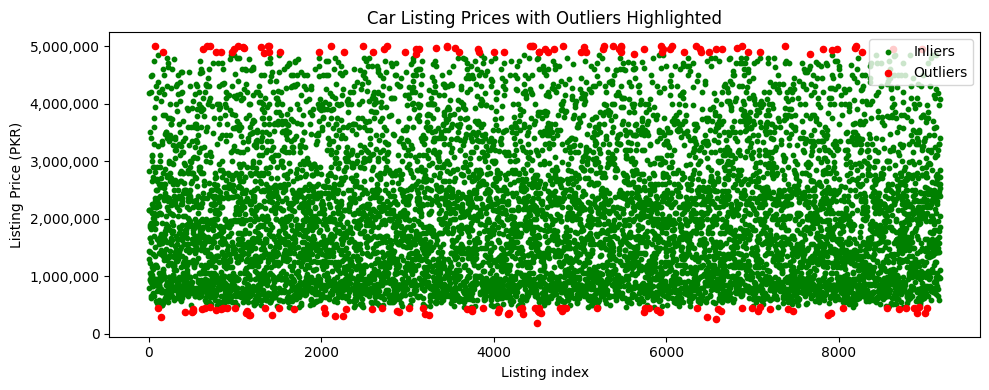

In [2]:
# Handle outliers
low_pct, high_pct = price.quantile([0.01, 0.99])
outliers_pct = df[(price < low_pct) | (price > high_pct)]
print(f"1st pct cutoff: PKR {low_pct:,.0f}, 99th pct cutoff: PKR {high_pct:,.0f}")
print(f"Number of outliers: {len(outliers_pct)}")

# Defining outlier rule (1st/99th percentile approach)
low_cutoff, high_cutoff = price.quantile([0.01, 0.99])
outlier_mask = (price < low_cutoff) | (price > high_cutoff)

# Plot
plt.figure(figsize=(10, 4))
# all “normal” points in blue
plt.scatter(df.index[~outlier_mask], price[~outlier_mask],
            c='green', s=10, label='Inliers')
# outliers in red
plt.scatter(df.index[outlier_mask], price[outlier_mask],
            c='red', s=20, label='Outliers')

# formatting
plt.xlabel("Listing index")
plt.ylabel("Listing Price (PKR)")
plt.title("Car Listing Prices with Outliers Highlighted")
plt.gca().ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.legend()
plt.tight_layout()
plt.show()



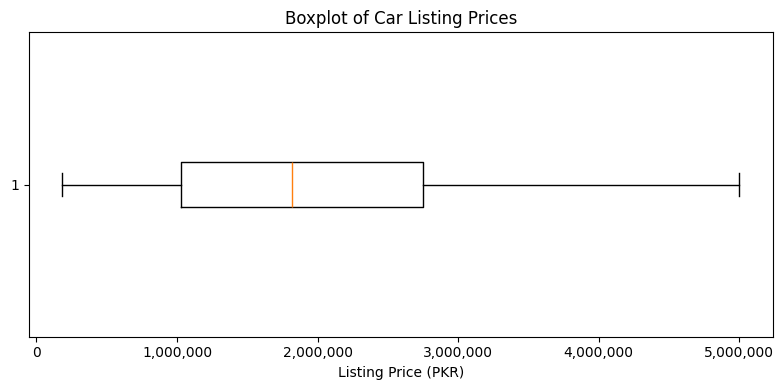

In [3]:
fig, ax = plt.subplots(figsize=(8, 4))

# draw the boxplot
ax.boxplot(price, vert=False)

# disable scientific notation on the x-axis and format
ax.ticklabel_format(style='plain', axis='x')
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

ax.set_xlabel("Listing Price (PKR)")
ax.set_title("Boxplot of Car Listing Prices")

plt.tight_layout()
plt.show()

In [4]:
make_stats = (
    df.groupby("Make")["Price"]
    .agg(["count", "mean", "median"])
    .sort_values("mean", ascending=False)
    .round(0)
)
print(make_stats)


            count       mean     median
Make                                   
Mercedes       45  3480756.0  3500000.0
Toyota       1606  3164000.0  3200000.0
Changan       192  3062677.0  2797500.0
Honda        1758  2664465.0  2650000.0
KIA           234  1738466.0  1400000.0
Daihatsu     1373  1633646.0  1450000.0
Mitsubishi    249  1542430.0  1420000.0
Suzuki       3048  1483745.0  1290000.0
FAW           137  1227285.0  1215000.0
Hyundai       460   884304.0   875000.0
Chevrolet      77   707831.0   690000.0


In [5]:
# Check by model
model_stats = (
    df.groupby(["Make","Model"])["Price"]
      .agg(count="count", mean="mean", median="median")
      .reset_index()
      # optionally filter to models with enough listings
      .query("count >= 10")
      .sort_values("mean", ascending=False)
)

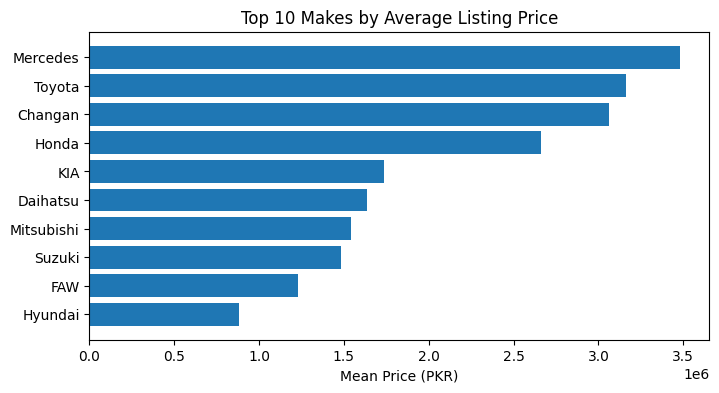

In [6]:
# Plot price by model
top_makes = make_stats.head(10)  # top 10 by mean price
plt.figure(figsize=(8,4))
plt.barh(top_makes.index, top_makes["mean"])
plt.xlabel("Mean Price (PKR)")
plt.title("Top 10 Makes by Average Listing Price")
plt.gca().invert_yaxis()
plt.show()

<Figure size 1000x600 with 0 Axes>

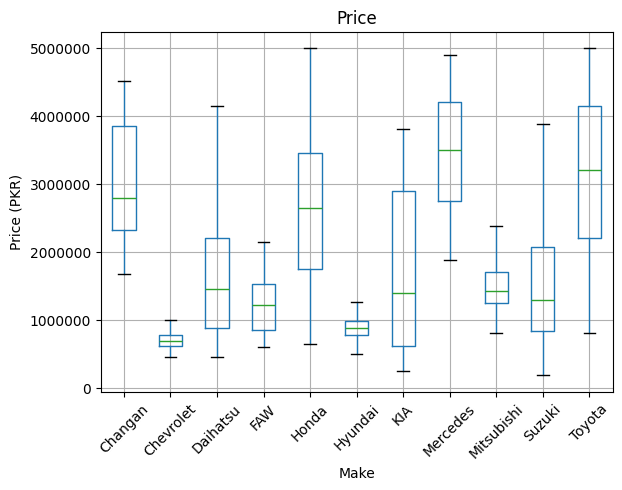

In [7]:
# Boxplot for better view of distribution
plt.figure(figsize=(10,6))
df.boxplot(column="Price", by="Make", rot=45, whis=1.5, showfliers=False)
plt.suptitle("")
plt.ylabel("Price (PKR)")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

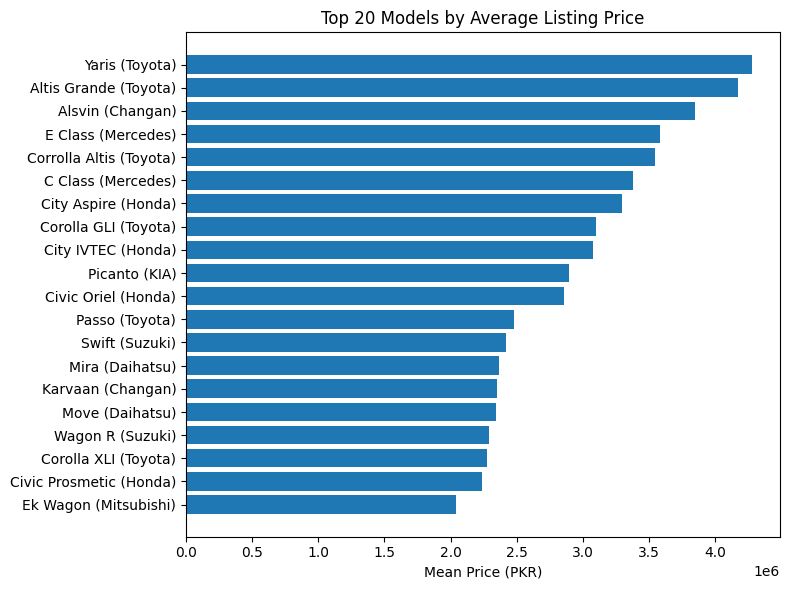

In [8]:
# Plot price by make
model_stats = model_stats.reset_index()
top20 = model_stats.head(20)

# build labels depending on what's available
labels = top20["Model"].astype(str)
if "Make" in top20.columns:
    labels = labels + " (" + top20["Make"].astype(str) + ")"

plt.figure(figsize=(8,6))
plt.barh(labels, top20["mean"])
plt.xlabel("Mean Price (PKR)")
plt.title("Top 20 Models by Average Listing Price")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()